# Activity 2: Implementing and Visualizing Backpropagation in a Two-Layer Neural Network (XOR Problem)

**Objective:**
You will:

1.  Implement backpropagation for a two-layer neural network.
2.  Experiment with different activation functions (tanh vs. sigmoid).
3.  Observe and visualize how weight updates propagate across multiple neurons.

**Instructions:**
1.  Fill in the missing code (TODO items) to complete backpropagation.
2.  Train the model and observe how weights update over time.
3.  Experiment with different activation functions (sigmoid, tanh) and compare learning behavior.
4.  Adjust hyperparameters (learning rate, epochs, hidden neurons) and analyze their effect on convergence.
5.  Visualize training progress using loss curves to interpret model performance.

Epoch 0, Loss: 0.2696
W1: [[1.76405235 0.40015721]
 [0.97873798 2.2408932 ]]
W2: [[ 1.86755799]
 [-0.97727788]]
----------------------------------------
Epoch 100, Loss: 0.2696
W1: [[1.76405235 0.40015721]
 [0.97873798 2.2408932 ]]
W2: [[ 1.86755799]
 [-0.97727788]]
----------------------------------------
Epoch 200, Loss: 0.2696
W1: [[1.76405235 0.40015721]
 [0.97873798 2.2408932 ]]
W2: [[ 1.86755799]
 [-0.97727788]]
----------------------------------------
Epoch 300, Loss: 0.2696
W1: [[1.76405235 0.40015721]
 [0.97873798 2.2408932 ]]
W2: [[ 1.86755799]
 [-0.97727788]]
----------------------------------------
Epoch 400, Loss: 0.2696
W1: [[1.76405235 0.40015721]
 [0.97873798 2.2408932 ]]
W2: [[ 1.86755799]
 [-0.97727788]]
----------------------------------------
Epoch 500, Loss: 0.2696
W1: [[1.76405235 0.40015721]
 [0.97873798 2.2408932 ]]
W2: [[ 1.86755799]
 [-0.97727788]]
----------------------------------------
Epoch 600, Loss: 0.2696
W1: [[1.76405235 0.40015721]
 [0.97873798 2.2408

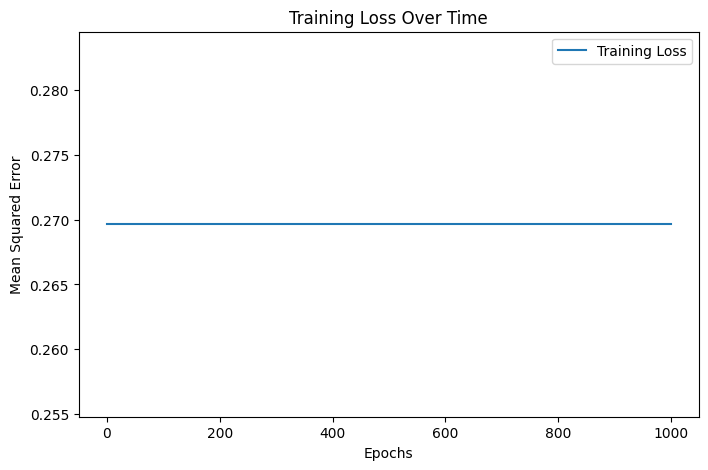

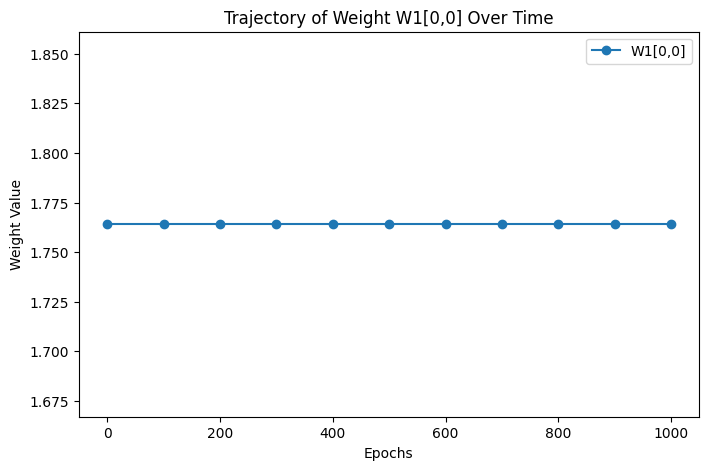

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------
# Activation Functions
# ---------------------------
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - x**2

activation_function = sigmoid  # try tanh
activation_derivative = sigmoid_derivative  # or tanh_derivative

# ---------------------------
# XOR Dataset
# ---------------------------
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])  # Inputs

y = np.array([[0],
              [1],
              [1],
              [0]])  # Expected outputs

# ---------------------------
# Network Parameters
# ---------------------------
input_size = 2
hidden_size = 2   # You can change this to experiment with more hidden neurons
output_size = 1
learning_rate = 0.1  # Experiment with different learning rates
epochs = 1000        # Experiment with more or fewer epochs

# ---------------------------
# Weight and Bias Initialization
# ---------------------------
np.random.seed(0)  # For reproducibility

W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

# try alternative weight initialization:

# ---------------------------
# Containers for Logging
# ---------------------------
losses = []           # To store training loss at each epoch
weight_history_W1 = []  # To log weights of W1 periodically
weight_history_W2 = []  # To log weights of W2 periodically
epochs_recorded = []    # To record the epoch numbers when weights are logged

# ---------------------------
# Training Loop
# ---------------------------
for epoch in range(epochs):
    # ---- Forward Pass ----
    hidden_input = np.dot(X, W1) + b1
    hidden_output = activation_function(hidden_input)

    final_input = np.dot(hidden_output, W2) + b2
    final_output = activation_function(final_input)

    # Compute Mean Squared Error loss
    loss = np.mean((y - final_output) ** 2)
    losses.append(loss)

    # ---- Backward Pass ----
    # Output layer error and delta
    output_error = y - final_output
    output_delta = output_error * activation_derivative(final_output)

    # Hidden layer error and delta
    # Note: W2 is the weight matrix connecting the hidden layer to the output layer. If there are H hidden neurons and O output neurons, W2 has the shape (H,O). So we use W2.T because the transpose of W2 has the shape (O,H).
    # Transposing allows us to "distribute" the error from the output layer back to each hidden neuron.
    hidden_error = np.dot(output_delta, W2.T)  # calculates the error for each hidden neuron by summing the contributions of the output errors (from output_delta) weighted by the corresponding connections (W2)
    hidden_delta = hidden_error * activation_derivative(hidden_output) #  The above error is then used to compute the gradient for the weights between the input and hidden layers.

    # TODO ---- Weight Updates ----
    W2 += 0.0 # learning_rate * np.dot(hidden_output.T, output_delta)
    b2 += 0.0 # learning_rate * np.sum(output_delta, axis=0, keepdims=True)

    W1 += 0.0 # learning_rate * np.dot(X.T, hidden_delta)
    b1 += 0.0 # learning_rate * np.sum(hidden_delta, axis=0, keepdims=True)

    # ---------------------------
    # Logging Weight Updates
    # ---------------------------
    # Log weights at every 100 epochs and also at the final epoch if not already logged.
    if epoch % 100 == 0 or epoch == epochs - 1:
        weight_history_W1.append(W1.copy())
        weight_history_W2.append(W2.copy())
        epochs_recorded.append(epoch)

    # Print progress every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")
        print("W1:", W1)
        print("W2:", W2)
        print("-" * 40)

# ---------------------------
# Visualization: Loss Curve
# ---------------------------
plt.figure(figsize=(8, 5))
plt.plot(losses, label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.title("Training Loss Over Time")
plt.legend()
plt.show()

# ---------------------------
# Visualization: Weight Trajectory
# ---------------------------
# For example, track the weight from input neuron 0 to hidden neuron 0 (W1[0,0])
w1_history = [w[0, 0] for w in weight_history_W1]

plt.figure(figsize=(8, 5))
plt.plot(epochs_recorded, w1_history, marker='o', label="W1[0,0]")
plt.xlabel("Epochs")
plt.ylabel("Weight Value")
plt.title("Trajectory of Weight W1[0,0] Over Time")
plt.legend()
plt.show()
